<a href="https://colab.research.google.com/github/Kishan-Kumar-Zalavadia/Material-Science/blob/main/code_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
# Define column names
x_axis = 't.strain.2'
y1_axis = 't.stress.2'
y2_axis = 'hard.Rate.2'

# Set the value of k for spline interpolation
k_value = 5

Cubic Polynomial Coefficients: [-3.83748532e-06 -9.90763650e+06  2.27587513e+06 -1.51960797e+04
 -2.26947340e+04  3.70465517e+03]

Polynomial Equation: -0.000004 x^5 + -9907636.499999 x^4 + 2275875.127000 x^3 + -15196.079673 x^2 + -22694.734017 x^1 + 3704.655165

Derivative Equation: -0.000019 x^4 + -39630545.999994 x^3 + 6827625.380999 x^2 + -30392.159346 x^1 + -22694.734017

Roots (Zeros) of the Derivative Equation: [-2.06544352e+12  1.35363472e-01  8.60703068e-02 -4.91518882e-02]

For x = -2065443523819.524902, y = -36062294666919290923605611916638274319296271980945211392.000000
For x = 0.135363, y = 2672.619793
For x = 0.086070, y = 2546.145410
For x = -0.049152, y = 4455.352750



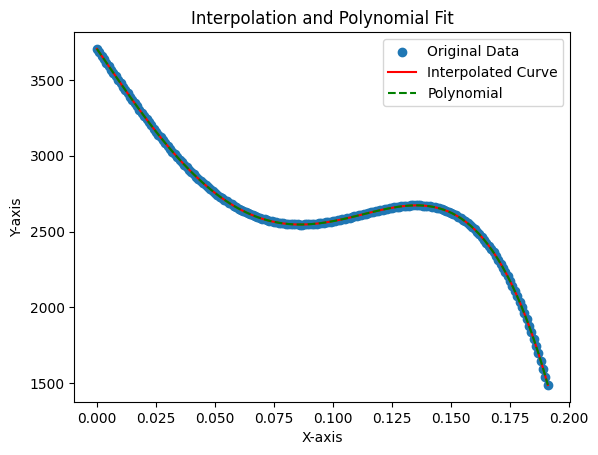

In [113]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/Data.xlsx'
df = pd.read_excel(file_path)

# Extract x and y columns
x = df[x_axis].values
y = df[y2_axis].values


# Check for and handle NaN or infinite values
mask = np.isfinite(x) & np.isfinite(y)
x = x[mask]
y = y[mask]


# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=k_value)


# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=k_value)

# Generate new x values for interpolation
x_new = np.linspace(min(x), max(x), 100)

# Perform interpolation
y_new = spline_interp(x_new)

# Fit cubic polynomial to the entire dataset
coefficients = np.polyfit(x, y, k_value)

# Print the coefficients
print("Cubic Polynomial Coefficients:", coefficients)

# Generate y values for the cubic polynomial
y_cubic = np.polyval(coefficients, x_new)

# Dynamic equation print
cubic_equation = "Polynomial Equation: "
for i, coef in enumerate(coefficients):
    cubic_equation += f"{coef:.6f} x^{k_value-i} + " if i < k_value else f"{coef:.6f}"
print()

# Remove the trailing ' + ' at the end
cubic_equation = cubic_equation.rstrip(' + ')
print(cubic_equation)
print()

# Take the derivative of the polynomial
derivative_coefficients = np.polyder(coefficients)

# Dynamic equation print for the derivative
derivative_equation = "Derivative Equation: "
for i, coef in enumerate(derivative_coefficients):
    derivative_equation += f"{coef:.6f} x^{k_value-1 -i} + " if i < k_value-1 else f"{coef:.6f}"
    # cubic_equation += f"{coef:.6f} x^{k_value-i} + " if i < k_value else f"{coef:.6f}"

# Remove the trailing ' + ' at the end
derivative_equation = derivative_equation.rstrip(' + ')
print(derivative_equation)
print()

# Find the roots (zeros) of the derivative equation
roots = np.roots(derivative_coefficients)
print("Roots (Zeros) of the Derivative Equation:", roots)
print()

# Calculate y values for each root using the original cubic polynomial
y_roots = np.polyval(coefficients, roots)

# Print the corresponding y values for the roots
for i, root in enumerate(roots):
    print(f"For x = {root:.6f}, y = {y_roots[i]:.6f}")
print()

# Plot the original data, interpolated curve, and cubic polynomial
plt.scatter(x, y, label='Original Data')
plt.plot(x_new, y_new, label='Interpolated Curve', color='red')
plt.plot(x_new, y_cubic, label='Polynomial', linestyle='dashed', color='green')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Interpolation and Polynomial Fit')
plt.show()


In [114]:
# Sort the y_roots array
y_roots_sorted = np.sort(y_roots)

# Find the differences between consecutive roots
differences = np.diff(y_roots_sorted)

# Find the index of the minimum difference
min_diff_index = np.argmin(differences)

# Determine the indices of the two closest roots
index1 = min_diff_index
index2 = min_diff_index + 1

# Store the minimum and maximum values
min_b0 = min(y_roots_sorted[index1], y_roots_sorted[index2])
max_b0 = max(y_roots_sorted[index1], y_roots_sorted[index2])

print("Minimum b0:", min_b0)
print("Maximum b0:", max_b0)


Minimum b0: 2546.14540992629
Maximum b0: 2672.619792740196


# Find D1

In [115]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.000   |   3704.655   |   -22694.777
2       |   0.001   |   3681.948   |   -22718.327
3       |   0.002   |   3659.223   |   -22728.528
4       |   0.003   |   3636.495   |   -22725.531
5       |   0.004   |   3613.776   |   -22709.597
6       |   0.005   |   3591.080   |   -22680.958
7       |   0.006   |   3568.418   |   -22639.853
8       |   0.007   |   3545.804   |   -22586.519
9       |   0.008   |   3523.249   |   -22521.194
10       |   0.009   |   3500.766   |   -22444.116
11       |   0.010   |   3478.365   |   -22355.524
12       |   0.011   |   3456.058   |   -22255.653
13       |   0.012   |   3433.857   |   -22144.743
14       |   0.013   |   3411.773   |   -22023.032
15       |   0.014   |   3389.815   |   -21890.756
16       |   0.015   |   3367.995   |   -21748.154
17       |   0.016   |   3346.322   |   -21595.463
18       |   0.017   |   3324.807   |   -21432.922
19 

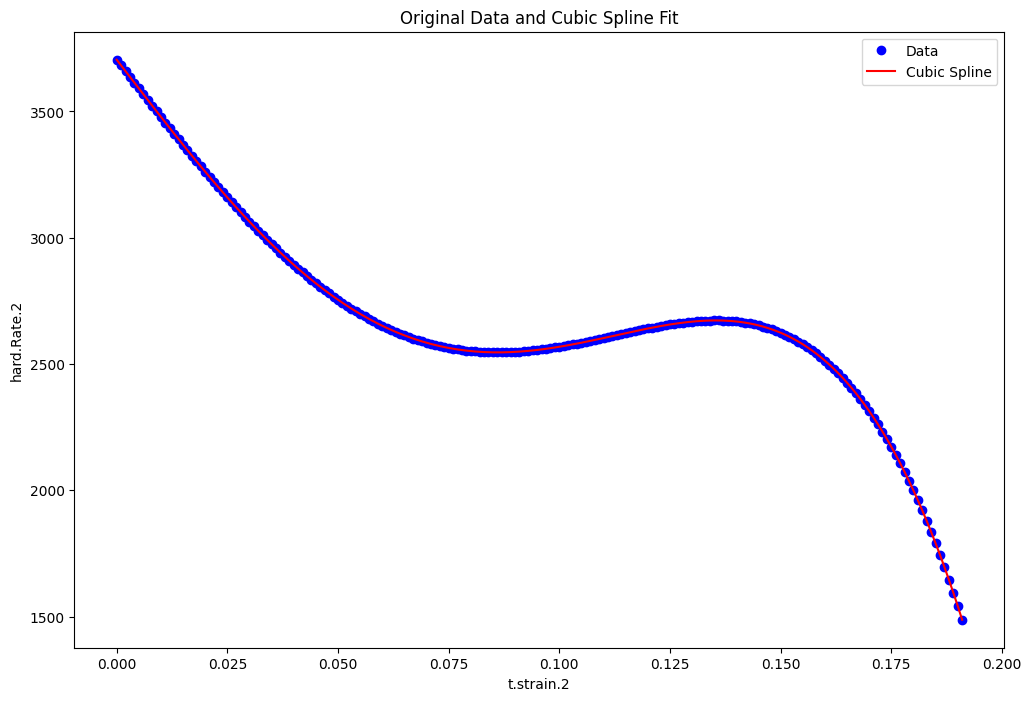

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

column_names = [x_axis, y2_axis]

# Read only the specified columns from Excel file
data = pd.read_excel("/content/Data.xlsx", usecols=column_names)

# Drop rows with missing or non-finite values
data.dropna(inplace=True)

# Extract x and y values
x = data[column_names[0]].values
y = data[column_names[1]].values

# Fit a cubic spline to the data
cs = CubicSpline(x, y)

# Calculate the slope for each data point
slopes = cs(x, 1)

# Print the slopes along with their corresponding x and y values
print("Point   |   x       |   y       |   Slope")
print("---------------------------------------------")
for i, (x_val, y_val, slope_val) in enumerate(zip(x, y, slopes)):
    print(f"{i+1}       |   {x_val:.3f}   |   {y_val:.3f}   |   {slope_val:.3f}")

# Plot the original data and cubic spline
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'bo', label='Data')
plt.plot(x, cs(x), 'r-', label='Cubic Spline')
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])
plt.title('Original Data and Cubic Spline Fit')
plt.legend()

plt.show()


Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.000   |   3704.655   |   -23.550   |   -22694.777
2       |   0.001   |   3681.948   |   -10.201   |   -22718.327
3       |   0.002   |   3659.223   |   2.997   |   -22728.528
4       |   0.003   |   3636.495   |   15.934   |   -22725.531
5       |   0.004   |   3613.776   |   28.639   |   -22709.597
6       |   0.005   |   3591.080   |   41.105   |   -22680.958
7       |   0.006   |   3568.418   |   53.334   |   -22639.853
8       |   0.007   |   3545.804   |   65.325   |   -22586.519
9       |   0.008   |   3523.249   |   77.078   |   -22521.194
10       |   0.009   |   3500.766   |   88.593   |   -22444.116
11       |   0.010   |   3478.365   |   99.870   |   -22355.524
12       |   0.011   |   3456.058   |   110.910   |   -22255.653
13       |   0.012   |   3433.857   |   121.712   |   -22144.743
14       |   0.013   |   3411.773   |   132.276   |   -22023.032
15 

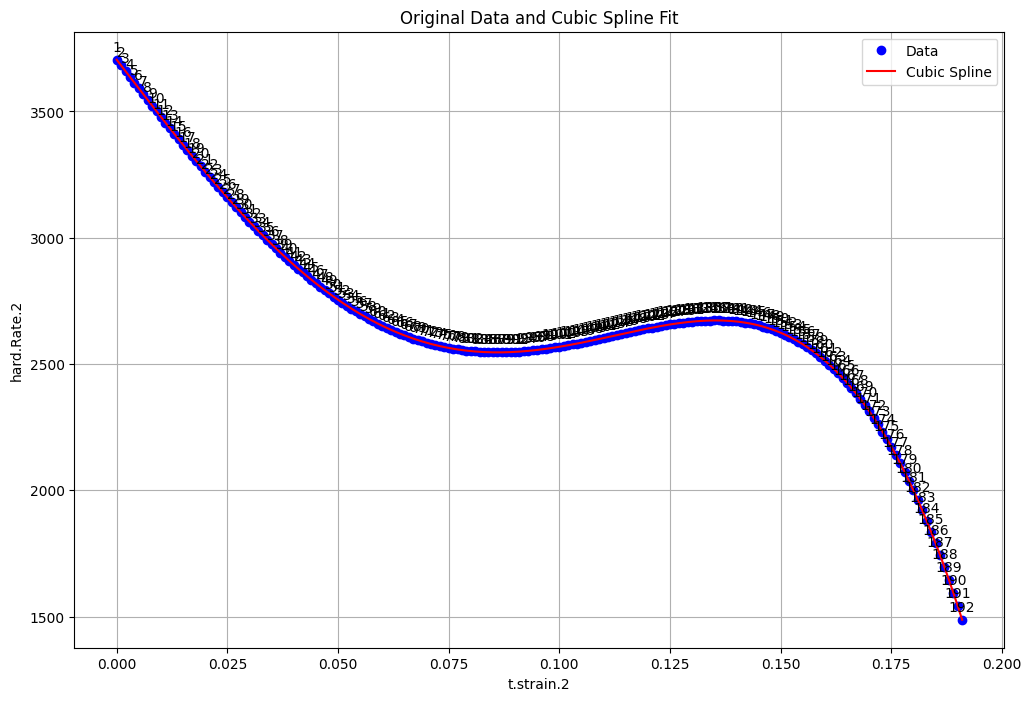

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Define the column names
column_names = [x_axis, y2_axis]

# Read only the specified columns from Excel file
data = pd.read_excel("/content/Data.xlsx", usecols=column_names)

# Drop rows with missing or non-finite values
data.dropna(inplace=True)

# Extract x and y values
x = data[column_names[0]].values
y = data[column_names[1]].values

# Fit a cubic spline to the data
cs = CubicSpline(x, y)

# Calculate the slope for each data point
slopes = cs(x, 1)

# Calculate the differences between consecutive slopes
slope_diffs = np.diff(slopes)

# Plot the original data and cubic spline
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'bo', label='Data')
plt.plot(x, cs(x), 'r-', label='Cubic Spline')
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])
plt.title('Original Data and Cubic Spline Fit')
plt.legend()

# Add point numbers with a gap above the points in the plot
gap = 50  # Adjust the gap as needed
for i, (x_val, y_val) in enumerate(zip(x, y)):
    slope = slopes[i]
    plt.text(x_val, y_val + gap, f"{i+1}", fontsize=10, ha='center', va='center')
plt.grid(True)

# Create a table for slopes for each point
slope_data = {'Point Number': np.arange(1, len(x) + 1), 'Slope': slopes}
slope_table = pd.DataFrame(slope_data)

# Store data point, x, y, and its difference in a new array
data_and_differences = np.column_stack((x[:-1], y[:-1], slope_diffs, slopes[:-1]))

print("Data Point | x Value | y Value | Difference | Slope:")
print("----------------------------------------------------")
for i, (x_val, y_val, diff, slope) in enumerate(data_and_differences):
    print(f"{i+1}       |   {x_val:.3f}   |   {y_val:.3f}   |   {diff:.3f}   |   {slope:.3f}")

plt.show()


### Remove all negative slopes

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.087   |   2546.259   |   254.168   |   242.611
2       |   0.088   |   2546.629   |   246.899   |   496.779
3       |   0.089   |   2547.250   |   239.391   |   743.678
4       |   0.090   |   2548.114   |   231.646   |   983.069
5       |   0.091   |   2549.213   |   223.663   |   1214.715
6       |   0.092   |   2550.541   |   215.442   |   1438.378
7       |   0.093   |   2552.087   |   206.983   |   1653.820
8       |   0.094   |   2553.845   |   198.287   |   1860.803
9       |   0.095   |   2555.806   |   189.353   |   2059.091


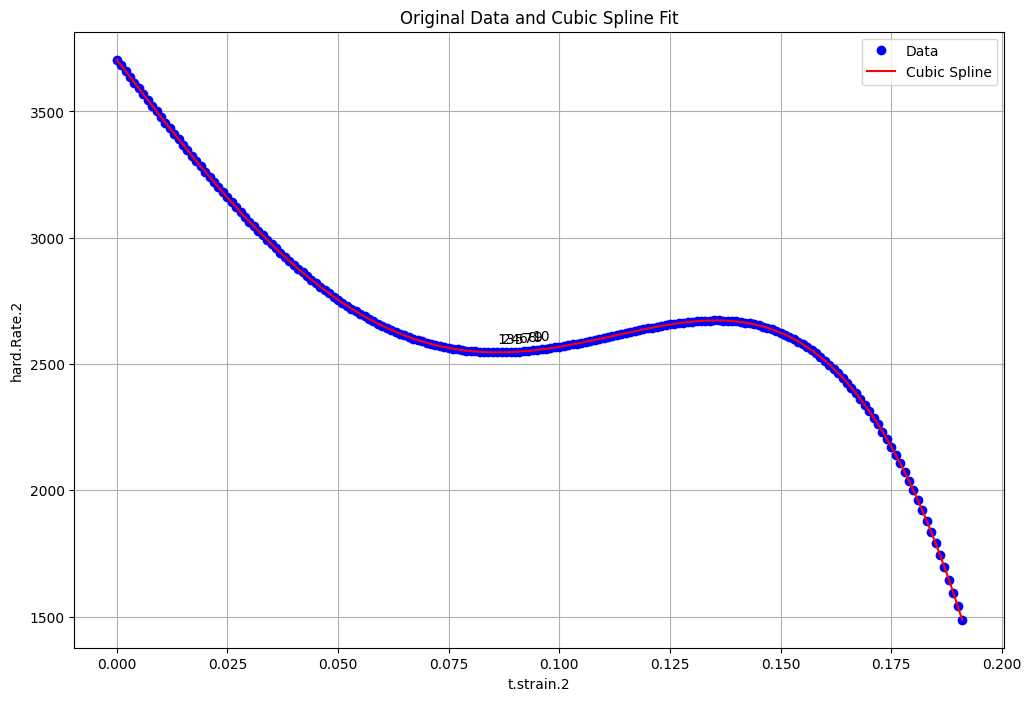

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Define the column names
column_names = [x_axis, y2_axis]

# Read only the specified columns from Excel file
data = pd.read_excel("/content/Data.xlsx", usecols=column_names)

# Drop rows with missing or non-finite values
data.dropna(inplace=True)

# Extract x and y values
x = data[column_names[0]].values
y = data[column_names[1]].values

# Fit a cubic spline to the data
cs = CubicSpline(x, y)

# Calculate the slope for each data point
slopes = cs(x, 1)

# Filter out negative slopes and their corresponding x, y values
positive_slope_indices = np.where(slopes > 0)[0]
x_positive = x[positive_slope_indices]
y_positive = y[positive_slope_indices]

# Calculate the differences between consecutive slopes
slope_diffs = np.diff(slopes[positive_slope_indices])

# Consider only the first 10 values or the available maximum
max_values = min(10, len(x_positive))
x_positive = x_positive[:max_values]
y_positive = y_positive[:max_values]
slope_diffs = slope_diffs[:max_values-1]  # As there are max_values-1 differences for max_values values

# Plot the original data and cubic spline
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'bo', label='Data')
plt.plot(x, cs(x), 'r-', label='Cubic Spline')
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])
plt.title('Original Data and Cubic Spline Fit')
plt.legend()

# Add point numbers with a gap above the points in the plot
gap = 50  # Adjust the gap as needed
for i, (x_val, y_val) in enumerate(zip(x_positive, y_positive)):
    plt.text(x_val, y_val + gap, f"{i+1}", fontsize=10, ha='center', va='center')
plt.grid(True)

# Store data point, x, y, and its difference in a new array
data_and_differences = np.column_stack((x_positive[:-1], y_positive[:-1], slope_diffs, slopes[positive_slope_indices][:max_values-1]))

print("Data Point | x Value | y Value | Difference | Slope:")
print("----------------------------------------------------")
for i, (x_val, y_val, diff, slope) in enumerate(data_and_differences):
    print(f"{i+1}       |   {x_val:.3f}   |   {y_val:.3f}   |   {diff:.3f}   |   {slope:.3f}")

plt.show()
